In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
x,y = [],[]
for i in range(0,49):
    for j in range(0,9):
        x.append(i)
        y.append(j)

In [4]:
top10 = pd.read_csv("top_10_genes.csv", index_col=0)

In [5]:
all_top_10 = list(top10.values.flatten())

In [6]:
cancers =  list(top10.index)
genes = list(set(top10.values.flatten()))
genes.sort()

In [7]:
import os
df_dict = {}
for root,dirs,files in os.walk("combined-stage-0724/all/"):
    for file in files:
        s_d = pd.read_csv("combined-stage-0724/all/" + file)
        df_dict[file.split(".")[0]] = s_d


In [8]:
li = []
cancer_idx = list(set(df_dict.keys()) - set(["TCGA-READ"]))
cancer_idx.sort()
for cancer in cancer_idx:
    print(cancer)
    sub_df = df_dict[cancer]
    nowli = []
    for g in genes: #genes.iloc[-1,:]:#
        adjpval = sub_df.loc[sub_df['Symbol'] == g]['adjpval']
        #print(adjpval.shape)
        if adjpval.shape[0] > 0:
            adjpval = adjpval.values[0]
        else:
            adjpval = None
        nowli.append(adjpval)
        
    li.append(nowli)

TCGA-BRCA
TCGA-COAD
TCGA-HNSC
TCGA-KIRC
TCGA-KIRP
TCGA-LIHC
TCGA-LUAD
TCGA-STAD
TCGA-THCA


In [9]:
len(li),len(cancers)

(9, 9)

In [10]:
S16_r = pd.DataFrame(li,index = cancers,columns = genes)
pd.set_option('display.float_format', lambda x: '%.3g' % x)
S16_r.to_csv("S16_r.csv")

In [11]:
xaxis_ori = list(pd.read_excel("upset_plot_label.xlsx","Sheet1",header = None)[0].values)

In [12]:
xaxis = [i for i in xaxis_ori if i in all_top_10]

In [13]:
for gene in all_top_10:
    if gene not in xaxis:
        print(gene)

In [14]:
len(xaxis),len(xaxis_ori)

(47, 47)

In [15]:
xaxis = list(reversed(xaxis))

In [16]:
yaxis = ['BRCA','COAD','HNSC','KIRC','KIRP','LIHC','LUAD','STAD','THCA']
yaxis.sort(reverse = False)


In [17]:
yaxis

['BRCA', 'COAD', 'HNSC', 'KIRC', 'KIRP', 'LIHC', 'LUAD', 'STAD', 'THCA']

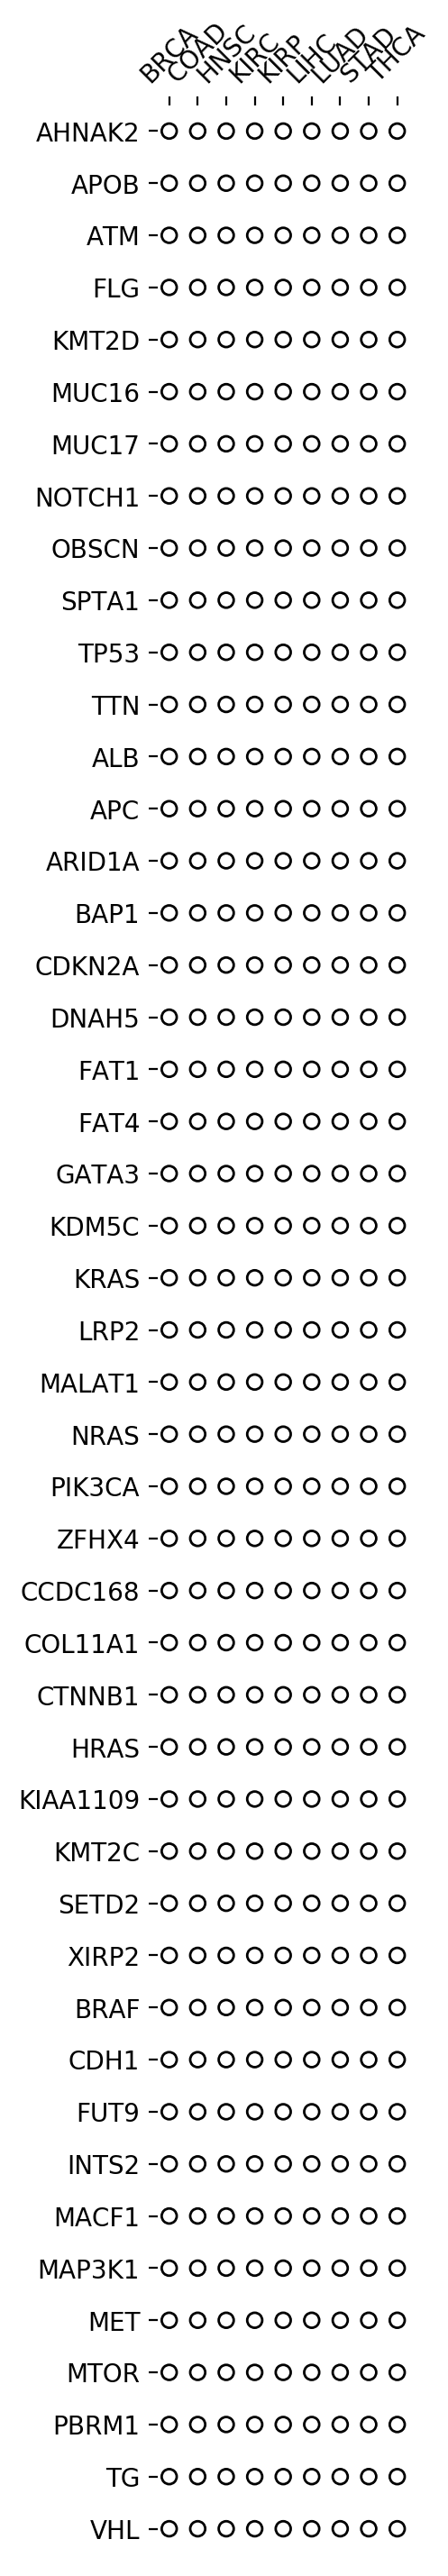

In [27]:
# fig = plt.figure(figsize=(20, 2),dpi=80,frameon=False)
# plt.scatter(x,y)
fig, ax = plt.subplots(figsize=(1.8, 18),dpi=200)
ax.scatter(y,x,facecolors='none', edgecolors='black')
#ax.axis('off')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_ylim(-0.5,len(xaxis)-0.5)
ax.set_xticks(range(len(yaxis)))
ax.set_xticklabels(yaxis,rotation = 45)
ax.set_yticks(range(len(xaxis)))
ax.set_yticklabels(xaxis)
ax.xaxis.tick_top()
plt.savefig('upset.png', bbox_inches="tight")

In [19]:
len(xaxis)

47